# Problem Statement
Microcredit is a common form of microfinance that involves an extremely small loan given to an individual to help them become self-employed or grow a small business. These borrowers tend to be low-income individuals, especially from less developed countries (LDCs). Microcredit is also known as "microlending" or "microloan."
                   We are working with one such client that is in Telecom Industry.They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
                   In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.Since Target is known,so it is a supervised
learning problem and target has categorical values (0 and 1),So it is a classification problem.                   


In [1]:
## Importing necessary libraries:-
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Loading the file
df = pd.read_csv("data file.csv")
pd.set_option('display.max_columns',None)
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


In [4]:
## Checking size of the data set
df.shape

(209593, 37)

There are 209593 rows and 37 columns.

In [5]:
## Checking data types
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [6]:
##Checking unique values in each column:-
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            146328
daily_decr90            155483
rental30                131338
rental90                139036
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     23907
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     22694
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

As pcircle has only one value that is UPW, so dropping this column will not affect label.

In [3]:
df.drop('pcircle',inplace = True, axis=1 )

In [10]:
df.shape

(209593, 36)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

There is not any null value present.

In [8]:
## again checking for null values:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [11]:
df['maxamnt_loans90'].value_counts()    

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

In [13]:
df['msisdn'].value_counts()

04581I85330    7
47819I90840    7
30080I90588    6
29191I82738    6
71742I90843    6
              ..
06249I90849    1
69757I84455    1
92771I89235    1
89841I89233    1
88078I88690    1
Name: msisdn, Length: 186243, dtype: int64

In [12]:
df['medianamnt_loans30'].value_counts()

0.0    195445
1.0      7149
0.5      6538
2.0       420
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64

In [13]:
df['medianamnt_loans90'].value_counts()

0.0    197424
1.0      6172
0.5      5668
2.0       307
1.5        19
3.0         3
Name: medianamnt_loans90, dtype: int64

# EDA

As date is in string format,converting it into numerical format.

In [4]:
df['recharge_day'] =pd.DatetimeIndex(df['pdate']).day

In [5]:
df['recharge_month']=pd.DatetimeIndex(df['pdate']).month

In [6]:
df['recharge_year']=pd.DatetimeIndex(df['pdate']).year

In [7]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,recharge_day,recharge_month,recharge_year
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20-07-2016,20,7,2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10-08-2016,8,10,2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19-08-2016,19,8,2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,06-06-2016,6,6,2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22-06-2016,22,6,2016


In [9]:
df['recharge_year'].value_counts()

2016    209593
Name: recharge_year, dtype: int64

All data are for year 2016 so will drop column pdate and recharge_year.

In [7]:
df.drop(columns=['Unnamed: 0','pdate','recharge_year'],inplace=True,axis =1)

In [8]:
df.shape

(209593, 36)

During data analysis I found that Mobile no of user is of 11 digit,where at 6th position at every mobile no ,letter I is present.

In [8]:
df['msisdn'] =[ i.replace('I','') for i in df['msisdn']]

In [27]:
df['msisdn']

0         2140870789
1         7646270374
2         1794370372
3         5577370781
4         0381382730
             ...    
209588    2275885348
209589    9558384455
209590    2855685350
209591    5971282733
209592    6506185339
Name: msisdn, Length: 209593, dtype: object

Mobile number is in string format,converting it into numerical format.

In [9]:
## Changing data type from string to float:-
df['msisdn'] = df['msisdn'].astype(float)

# Visualization

# UniVariate Analysis

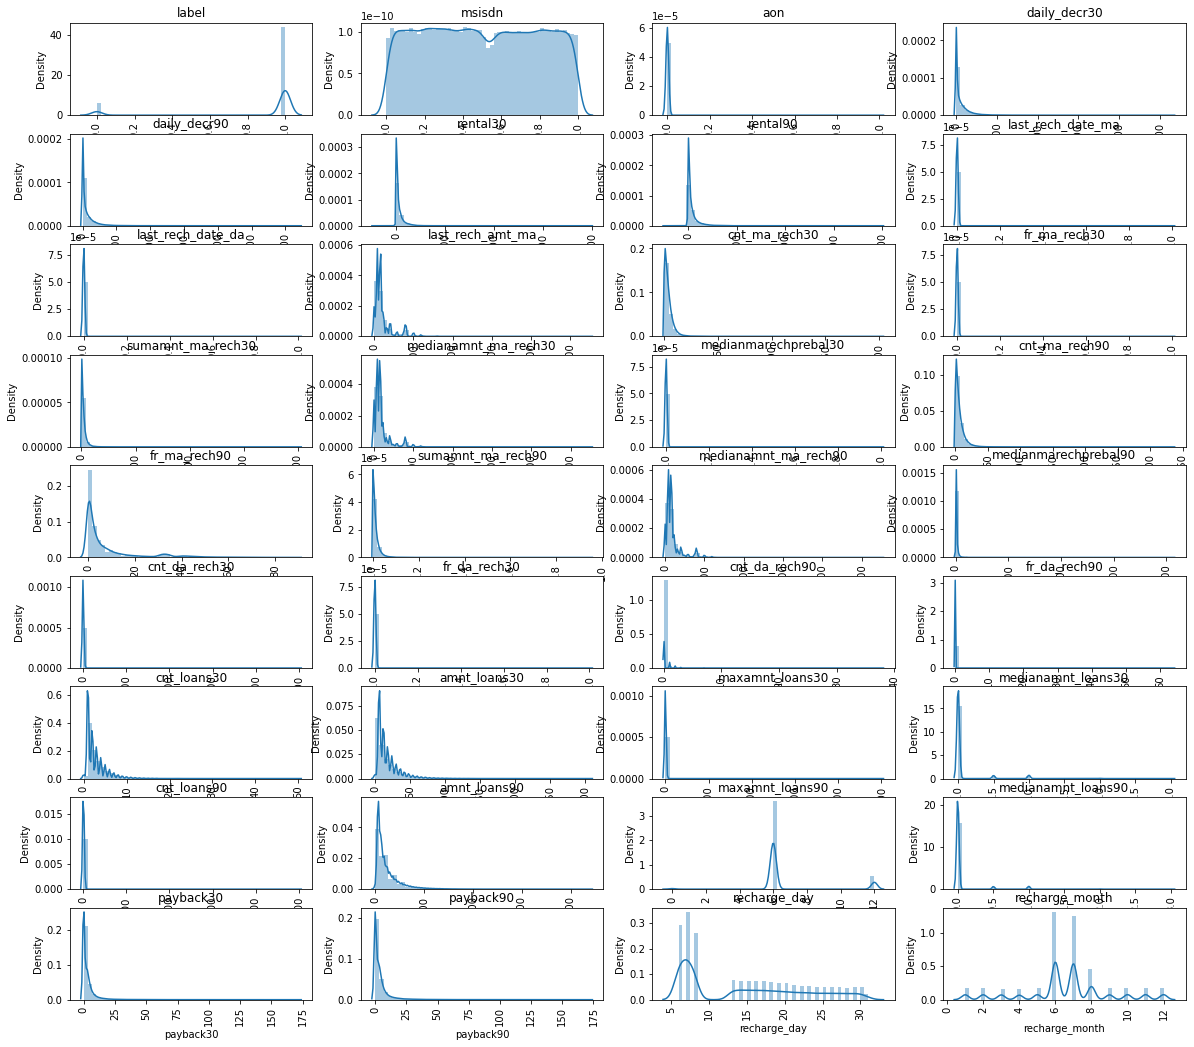

In [33]:
plt.figure(figsize=(20,20))
graph =1
for i in df.columns:
    if graph <=37:
        ax=plt.subplot(10,4,graph)
        sns.distplot(df[i])
        plt.title(i)
        plt.xticks(rotation=90)
        graph += 1
plt.show()        

Almost all the column's  data rightly skewed.

<AxesSubplot:title={'center':'Relation between daily_decr30 and label'}, xlabel='daily_decr30', ylabel='label'>

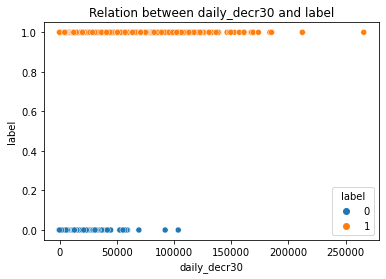

In [158]:
plt.title("Relation between daily_decr30 and label")
sns.scatterplot(x=df['daily_decr30'],y = df['label'],hue = df['label'],data = df)

Non Defaulter customer's(label with 1) daily amount spent from main account(averaged over last 30 days) ranges mostly from 0 to approx 1,70000 rupiah,where as Defaulter customer's daily amount spent from main account is from 0 to approx 70,000 rupiah.

<AxesSubplot:title={'center':'Relation between daily_decr90 and label'}, xlabel='daily_decr90', ylabel='label'>

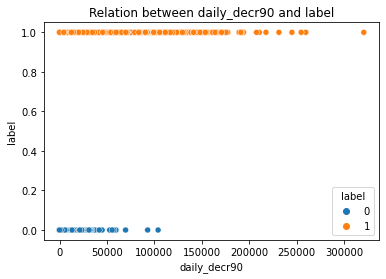

In [159]:
plt.title("Relation between daily_decr90 and label")
sns.scatterplot(x=df['daily_decr90'],y = df['label'],hue = df['label'],data = df)

Non Defaulter customer's(label with 1) daily amount spent from main account(averaged over last 90 days) ranges mostly from 0 to approx 2,20000 rupiah,where as Defaulter customer's daily amount spent from main account is from 0 to approx 70,000 rupiah.

<AxesSubplot:title={'center':'Relation between rental30 and label'}, xlabel='rental30', ylabel='label'>

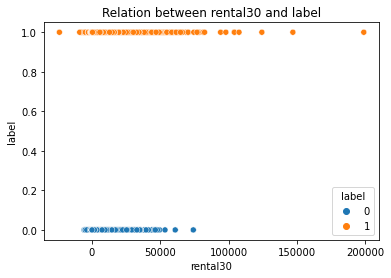

In [160]:
plt.title("Relation between rental30 and label")
sns.scatterplot(x=df['rental30'],y = df['label'],hue = df['label'],data = df)

Non Defaulter customer's(label with 1) average main account balance( over last 30 days) ranges mostly from 0 to 
approx 1,20000 rupiah,where as Defaulter customer's average main account balance(over last 30 days) is from 0 to approx 60,000 rupiah.Outliers are  also present in the dataset.

<AxesSubplot:title={'center':'Relation between rental90 and label'}, xlabel='rental90', ylabel='label'>

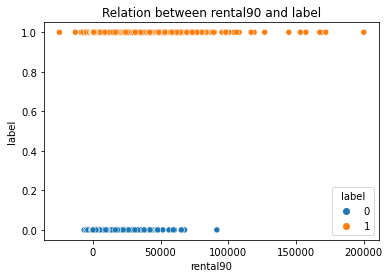

In [161]:
plt.title("Relation between rental90 and label")
sns.scatterplot(x=df['rental90'],y = df['label'],hue = df['label'],data = df)

Non Defaulter customer's(label with 1) average main account balance( over last 90 days) ranges mostly from 0 to 
approx 1,20000 rupiah,where as Defaulter customer's average main account balance(over last 90 days) is from 0 to approx 60,000 rupiah.Outliers are present in the dataset.

<AxesSubplot:title={'center':'Relation between last_rech_date_ma and label'}, xlabel='last_rech_date_ma', ylabel='label'>

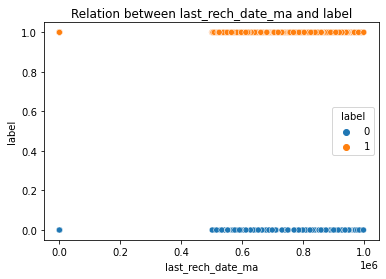

In [162]:
plt.title("Relation between last_rech_date_ma and label")
sns.scatterplot(x=df['last_rech_date_ma'],y = df['label'],hue = df['label'],data = df)

Non Defaulter customer's(label with 1) number of days till last recharge of main account is same as Defaulter customer's 
number of days till last rechage of main account.

<AxesSubplot:title={'center':'Relation between last_rech_date_da and label'}, xlabel='last_rech_date_da', ylabel='label'>

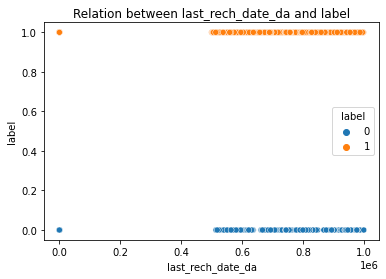

In [163]:
plt.title("Relation between last_rech_date_da and label")
sns.scatterplot(x=df['last_rech_date_da'],y = df['label'],hue = df['label'],data = df)

Non Defaulter customer's(label with 1) number of days till last recharge of data account is same as Defaulter customer's 
number of days till last rechage of main account.

<AxesSubplot:title={'center':'Relation between last_rech_amt_ma and label'}, xlabel='last_rech_amt_ma', ylabel='label'>

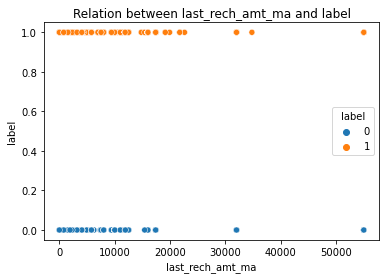

In [10]:
plt.title("Relation between last_rech_amt_ma and label")
sns.scatterplot(x=df['last_rech_amt_ma'],y = df['label'],hue = df['label'],data = df)

Non Defaulter customer's(label with 1) amount of last recharge of main account is slightly more than Defaulter customer's 
number of days till last rechage of main account.

<AxesSubplot:title={'center':'Relation between cnt_ma_rech30 and label'}, xlabel='cnt_ma_rech30', ylabel='label'>

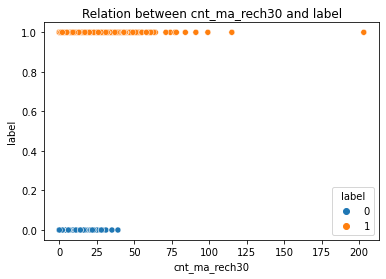

In [164]:
plt.title("Relation between cnt_ma_rech30 and label")
sns.scatterplot(x=df['cnt_ma_rech30'],y = df['label'],hue = df['label'],data = df)

Non Defaulter customer's(label with 1) number of times main account got recharged in last 30 days is more than Defaulter 
customer's main account got recharged in last 30 days.

<AxesSubplot:title={'center':'Relation between fr_ma_rech30 and label'}, xlabel='fr_ma_rech30', ylabel='label'>

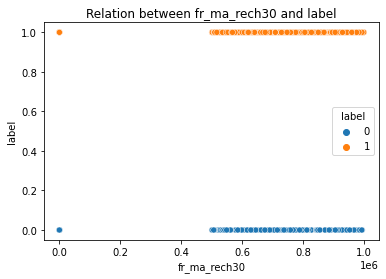

In [165]:
plt.title("Relation between fr_ma_rech30 and label")
sns.scatterplot(x=df['fr_ma_rech30'],y = df['label'],hue = df['label'],data = df)

Non Defaulter customer's(label with 1) frequency of main account got recharged in last 30 days is same as Defaulter 
customer's main account got recharged in last 30 days.So we can say this feature is not very significant to decide Default
or  Non Default customers.

<AxesSubplot:title={'center':'Relation between sumamnt_ma_rech90 and label'}, xlabel='sumamnt_ma_rech90', ylabel='label'>

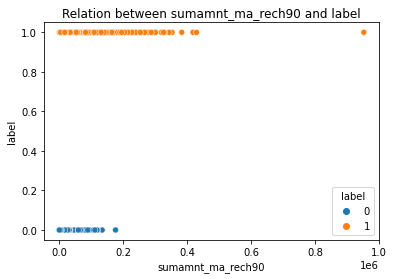

In [166]:
plt.title("Relation between sumamnt_ma_rech90 and label")
sns.scatterplot(x=df['sumamnt_ma_rech90'],y = df['label'],hue = df['label'],data = df)

Non Defaulter customer's(label with 1) Total amount of recharge in main account  over last 30 days is more than Defaulter 
customer's Total amount of recharge in main account  over last 30 days.

<AxesSubplot:title={'center':'Relation between medianamnt_ma_rech90 and label'}, xlabel='medianamnt_ma_rech90', ylabel='label'>

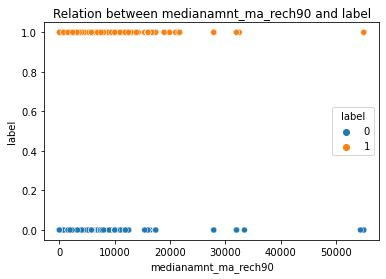

In [157]:
plt.title("Relation between medianamnt_ma_rech30 and label")
sns.scatterplot(x=df['medianamnt_ma_rech30'],y = df['label'],hue = df['label'],data = df)

Non Defaulter customer's(label with 1) Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)  is more than Defaulter 
customers.

<AxesSubplot:title={'center':'Relation between medianmarechprebal30 and label'}, xlabel='medianmarechprebal30', ylabel='label'>

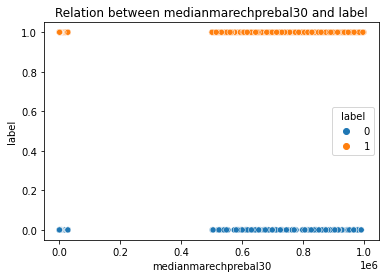

In [156]:
plt.title("Relation between medianmarechprebal30 and label")
sns.scatterplot(x=df['medianmarechprebal30'],y = df['label'],hue = df['label'],data = df)

Non Defaulter customer's(label with 1) Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah) is same as Defaulter customer's.So we can say this feature is not very significant to decide Default
or  Non Default customers.

<AxesSubplot:title={'center':'Relation between cnt_ma_rech90 and label'}, xlabel='cnt_ma_rech90', ylabel='label'>

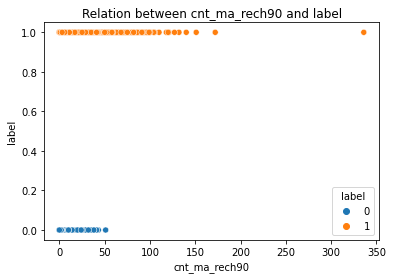

In [155]:
plt.title("Relation between cnt_ma_rech90 and label")
sns.scatterplot(x=df['cnt_ma_rech90'],y = df['label'],hue = df['label'],data = df)

Non Defaulter customer's(label with 1) Number of times main account got recharged in last 90 days is more than Defaulter 
customers Number of times main account got recharged in last 90 days.

<AxesSubplot:title={'center':'Relation between fr_ma_rech90 and label'}, xlabel='fr_ma_rech90', ylabel='label'>

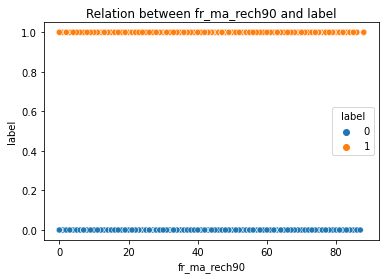

In [154]:
plt.title("Relation between fr_ma_rech90 and label")
sns.scatterplot(x=df['fr_ma_rech90'],y = df['label'],hue = df['label'],data = df)

Non Defaulter customer's(label with 1) frequency of main account recharged in last 90 days is same as Defaulter 
customer's frequency of main account recharged in last 90 days. 

<AxesSubplot:title={'center':'Relation between sumamnt_ma_rech90 and label'}, xlabel='sumamnt_ma_rech90', ylabel='label'>

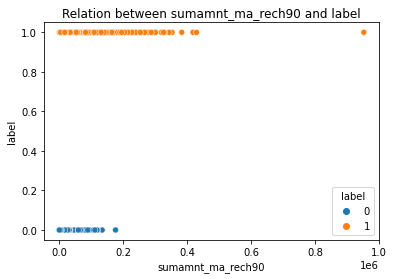

In [153]:
plt.title("Relation between sumamnt_ma_rech90 and label")
sns.scatterplot(x=df['sumamnt_ma_rech90'],y = df['label'],hue = df['label'],data = df)

Non Defaulter customer's(label with 1) Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)is 
more than Defaulter customer's Total amount of recharge in main account over last 90 days.

<AxesSubplot:title={'center':'Relation between medianmarechprebal90 and label'}, xlabel='medianamnt_ma_rech90', ylabel='label'>

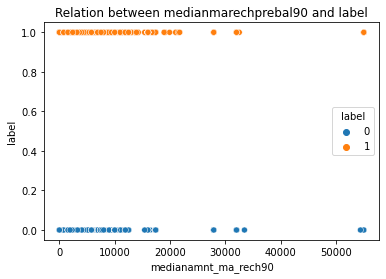

In [152]:
plt.title("Relation between medianmarechprebal90 and label")
sns.scatterplot(x=df['medianamnt_ma_rech90'],y = df['label'],hue = df['label'],data = df)

Non Defaulter customer's(label with 1) Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah) is more than Defaulter customer's Median of amount of recharges done in main account over last 90 days at user level.

<AxesSubplot:title={'center':'Relation between medianmarechprebal90 and label'}, xlabel='medianmarechprebal90', ylabel='label'>

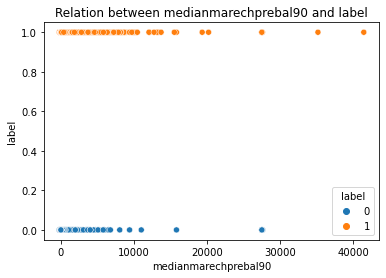

In [151]:
plt.title("Relation between medianmarechprebal90 and label")
sns.scatterplot(x=df['medianmarechprebal90'],y = df['label'],hue = df['label'],data = df)

Non Defaulter customer's(label with 1) Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah) is more than Defaulter customer's Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

<AxesSubplot:title={'center':'Relation between cnt_da_rech30 and label'}, xlabel='cnt_da_rech30', ylabel='label'>

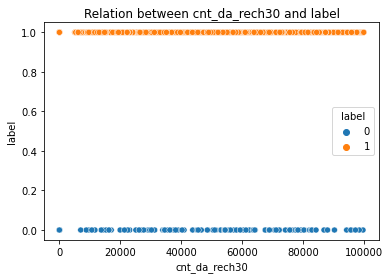

In [150]:
plt.title("Relation between cnt_da_rech30 and label")
sns.scatterplot(x=df['cnt_da_rech30'],y = df['label'],hue = df['label'],data = df)

Non Defaulter customer's(label with 1) Number of times data account got recharged in last 30 days is same as Defaulter customer's Number of times data account got recharged in last 30 days.So we can say that this feature is not going to help in predicting Defaulter or Non Defaulter customer.

<AxesSubplot:title={'center':'Relation between fr_da_rech30 and label'}, xlabel='fr_da_rech30', ylabel='label'>

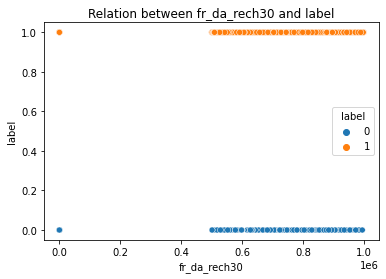

In [149]:
plt.title("Relation between fr_da_rech30 and label")

sns.scatterplot(x=df['fr_da_rech30'],y = df['label'],hue = df['label'],data = df)

Non Defaulter customer's(label with 1) frequency of data account got recharged in last 30 days is same as Defaulter customer's frequency of  data account got recharged in last 30 days.So we can say that this feature is not going to help in predicting Defaulter or Non Defaulter customer.

<AxesSubplot:title={'center':'Relation between cnt_da_rech90 and label'}, xlabel='cnt_da_rech90', ylabel='label'>

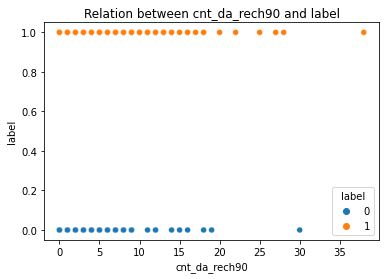

In [148]:
plt.title("Relation between cnt_da_rech90 and label")
sns.scatterplot(x=df['cnt_da_rech90'],y = df['label'],hue = df['label'],data = df)

Non Defaulter customer's(label with 1) number of times data account got recharged in last 90 days is more than Defaulter customer's number of times data account got recharged in last 90 days.

<AxesSubplot:title={'center':' Relation between fr_da_rech90 and label '}, xlabel='fr_da_rech90', ylabel='label'>

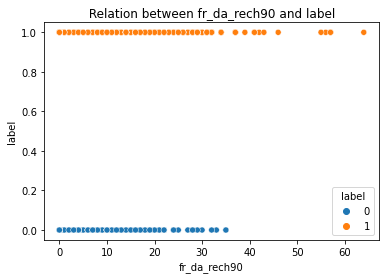

In [146]:
plt.title(" Relation between fr_da_rech90 and label ")
sns.scatterplot(x=df['fr_da_rech90'],y = df['label'],hue = df['label'],data = df)

Non Defaulter customer's(label with 1) frequency of data account recharged in last 90 days is more than Defaulter customer's frequency of data account recharged in last 90 days.

<AxesSubplot:title={'center':' Relation between cnt_loans30 and label '}, xlabel='cnt_loans30', ylabel='label'>

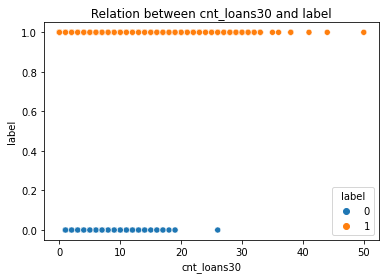

In [12]:
plt.title(" Relation between cnt_loans30 and label ")
sns.scatterplot(x=df['cnt_loans30'],y = df['label'],hue = df['label'],data = df)

Non Defaulter customer's(label with 1) number of loan taken is more than Defaulter model.

<AxesSubplot:title={'center':' Relation between amnt_loans30 and label '}, xlabel='amnt_loans30', ylabel='label'>

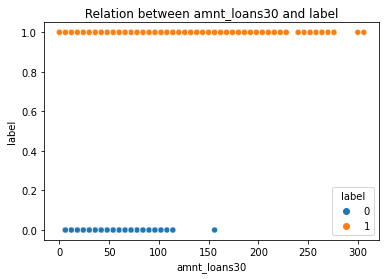

In [145]:
plt.title(" Relation between amnt_loans30 and label ")
sns.scatterplot(x=df['amnt_loans30'],y = df['label'],hue = df['label'],data = df)


Non Defaulter customer's(label with 1) total amount of loans taken in last 30 days is more than Defaulter customer's Total amount of loans taken in last 30 days.

Text(0.5, 1.0, ' Relation between maxamnt_loans30 and label ')

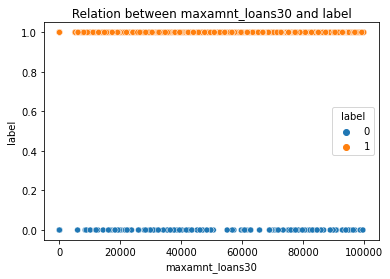

In [144]:
sns.scatterplot(x=df['maxamnt_loans30'],y = df['label'],hue = df['label'],data = df)
plt.title(" Relation between maxamnt_loans30 and label ")

Non Defaulter customer's(label with 1) maximum amount of loan taken in last 30 days is almost same as Defaulter customer's 
maximum amount of loan  in last 30 days.

Text(0.5, 1.0, ' Relation between medianamnt_loans30 and label ')

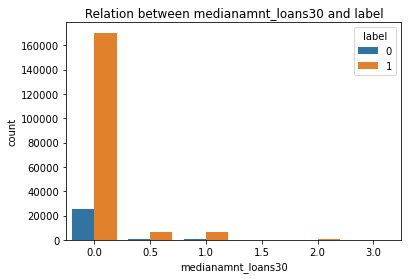

In [143]:
sns.countplot(df['medianamnt_loans30'],hue = df['label'],data = df)
plt.title(" Relation between medianamnt_loans30 and label ")

Non Defaulter customer's (label with 1) Median of amounts of loan taken by the user in last 30 days is more than defaulter
customers

Text(0.5, 1.0, ' Relation between cnt_loans90 and label ')

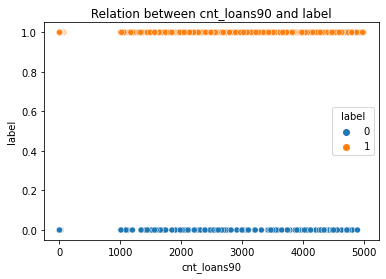

In [142]:
sns.scatterplot(x=df['cnt_loans90'],y = df['label'],hue = df['label'],data = df)
plt.title(" Relation between cnt_loans90 and label ")

Non Defaulter customer's (label with 1) number of loans taken in last 90 days is same as defaulter
customers.So this feature will not help in predicting non defaulter or defaulter customers.

Text(0.5, 1.0, ' Relation between amnt_loans90 and label ')

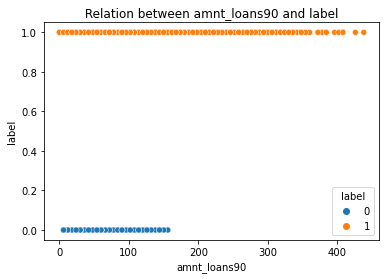

In [141]:
sns.scatterplot(x=df['amnt_loans90'],y = df['label'],hue = df['label'],data = df)
plt.title(" Relation between amnt_loans90 and label ")

Non Defaulter customer's (label with 1) total amount of loans taken  in last 90 days is more than defaulter
customers.

<AxesSubplot:title={'center':' Relation between maxamnt_loans90 and label '}, xlabel='maxamnt_loans90', ylabel='label'>

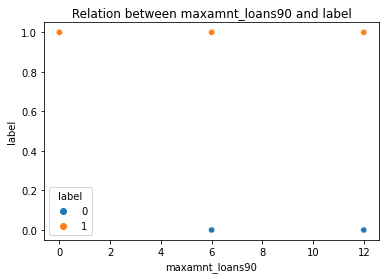

In [167]:
plt.title(" Relation between maxamnt_loans90 and label ")
sns.scatterplot(x = df['maxamnt_loans90'],y = df['label'],hue = df['label'],data = df)

Non Defaulter customer's (label with 1) maximum amount of loan taken in last 90 days is same as defaulter
customers.Maximum amount of loan is 6 and 12 rupiah.

<AxesSubplot:title={'center':' Relation between medianamnt_loans90 and label '}, xlabel='medianamnt_loans90', ylabel='label'>

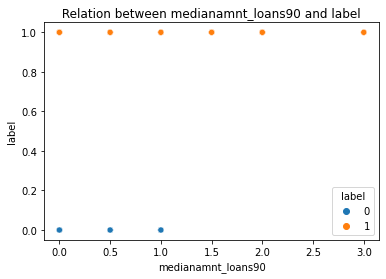

In [168]:
plt.title(" Relation between medianamnt_loans90 and label ")
sns.scatterplot(x = df['medianamnt_loans90'],y = df['label'],hue = df['label'],data = df)

Non Defaulter customer's (label with 1) median of amounts of loan taken in last 90 days is more than defaulter
customers.

<AxesSubplot:title={'center':' Relation between payback30 and label '}, xlabel='payback30', ylabel='label'>

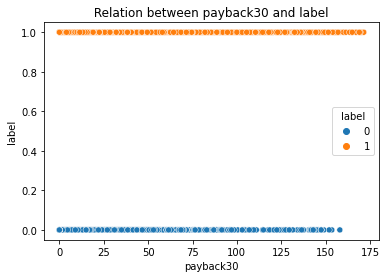

In [169]:
plt.title(" Relation between payback30 and label ")
sns.scatterplot(x = df['payback30'],y = df['label'],hue = df['label'],data = df)

Non Defaulter customer's (label with 1)  count of average payback time in days over last 30 days is more than defaulter customers

<AxesSubplot:title={'center':' Relation between payback90 and label '}, xlabel='payback90', ylabel='label'>

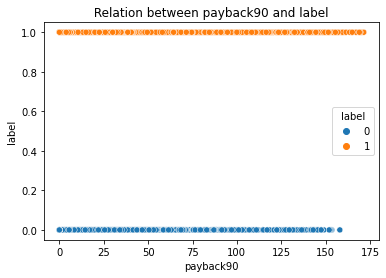

In [170]:
plt.title(" Relation between payback90 and label ")
sns.scatterplot(x = df['payback90'],y = df['label'],hue = df['label'],data = df)

Non Defaulter customer's (label with 1)  count of average payback time in days over last 90 days is more than defaulter customers.

<AxesSubplot:title={'center':' Relation between recharge_day and label '}, xlabel='recharge_day', ylabel='label'>

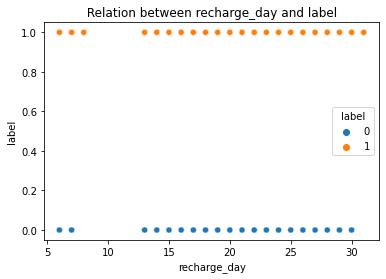

In [11]:
plt.title(" Relation between recharge_day and label ")
sns.scatterplot(x = df['recharge_day'],y = df['label'],hue = df['label'],data = df)

# Correlation

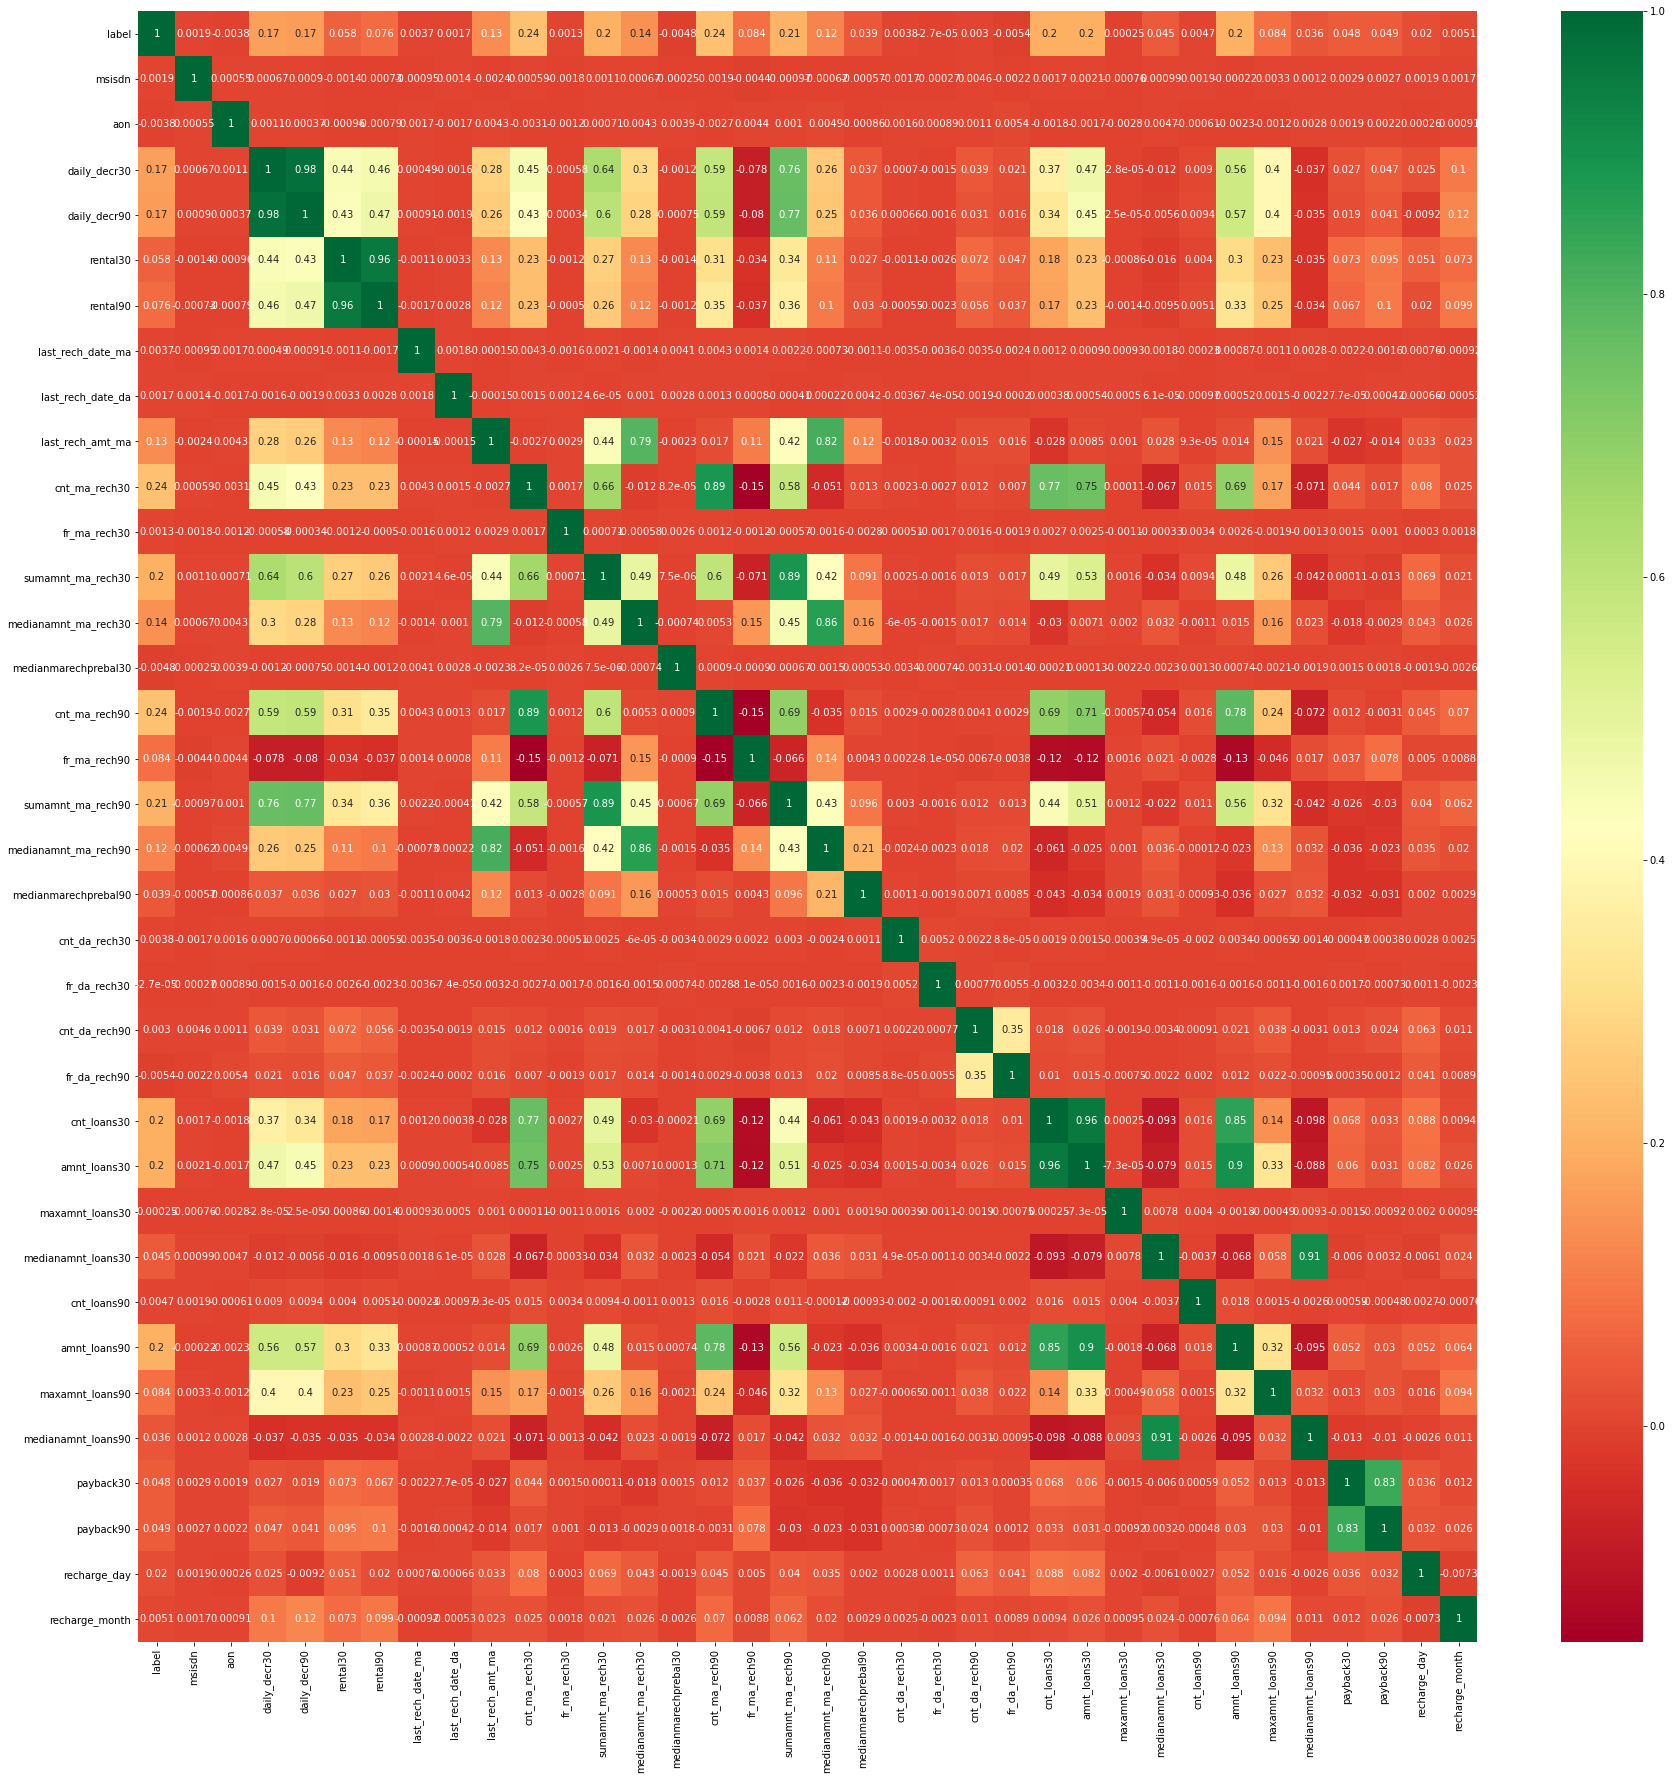

In [37]:
plt.figure(figsize =(30,30))
sns.heatmap(df.corr(),annot = True,cmap ='RdYlGn')
plt.show()

<AxesSubplot:>

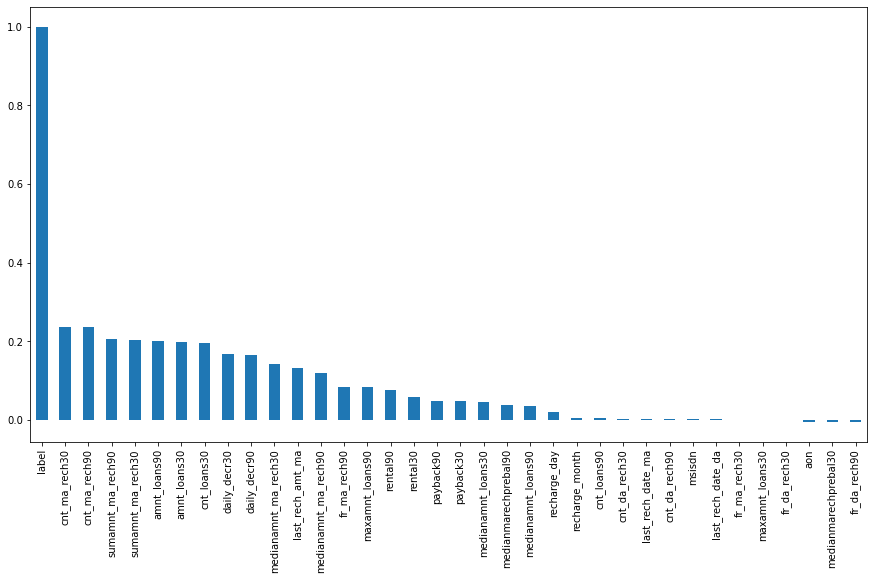

In [38]:
plt.figure(figsize=(15,8))
df.corr()['label'].sort_values(ascending = False).plot(kind='bar')


So from here we can see some of the columns are very weakly correlated with label,So will drop these columns.

In [10]:
df.drop(columns=['recharge_month','cnt_loans90','cnt_da_rech30','last_rech_date_ma','cnt_da_rech90','msisdn','last_rech_date_da','fr_ma_rech30','maxamnt_loans30',
                'fr_da_rech30','aon','medianmarechprebal30','fr_da_rech90'],axis=1,inplace = True)

In [12]:
df.shape

(209593, 23)

In [13]:
df.describe()

,label,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,recharge_day
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,5381.402289,6082.515068,2692.581910,3483.406534,2064.452797,3.978057,7704.501157,1812.817952,6.31543,7.716780,12396.218352,1864.595821,92.025541,2.758981,17.952021,0.054029,23.645398,6.703134,0.046077,3.398826,4.321485,14.584008
std,0.330519,9220.623400,10918.812767,4308.586781,5770.461279,2370.786034,4.256090,10139.621714,2070.864620,7.19347,12.590251,16857.793882,2081.680664,369.215658,2.554502,17.379741,0.218039,26.469861,2.103864,0.200692,8.813729,10.308108,7.953396
min,0.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,1.000000,42.440000,42.692000,280.420000,300.260000,770.000000,1.000000,1540.000000,770.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,1.000000,6.000000,0.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.000000
50%,1.000000,1469.175667,1500.000000,1083.570000,1334.000000,1539.000000,3.000000,4628.000000,1539.000000,4.00000,2.000000,7226.000000,1539.000000,36.000000,2.000000,12.000000,0.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.000000
75%,1.000000,7244.000000,7802.790000,3356.940000,4201.790000,2309.000000,5.000000,10010.000000,1924.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,4.000000,24.000000,0.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.000000
max,1.000000,265926.000000,320630.000000,198926.110000,200148.110000,55000.000000,203.000000,810096.000000,55000.000000,336.00000,88.000000,953036.000000,55000.000000,41456.500000,50.000000,306.000000,3.000000,438.000000,12.000000,3.000000,171.500000,171.500000,31.000000


# Outliers

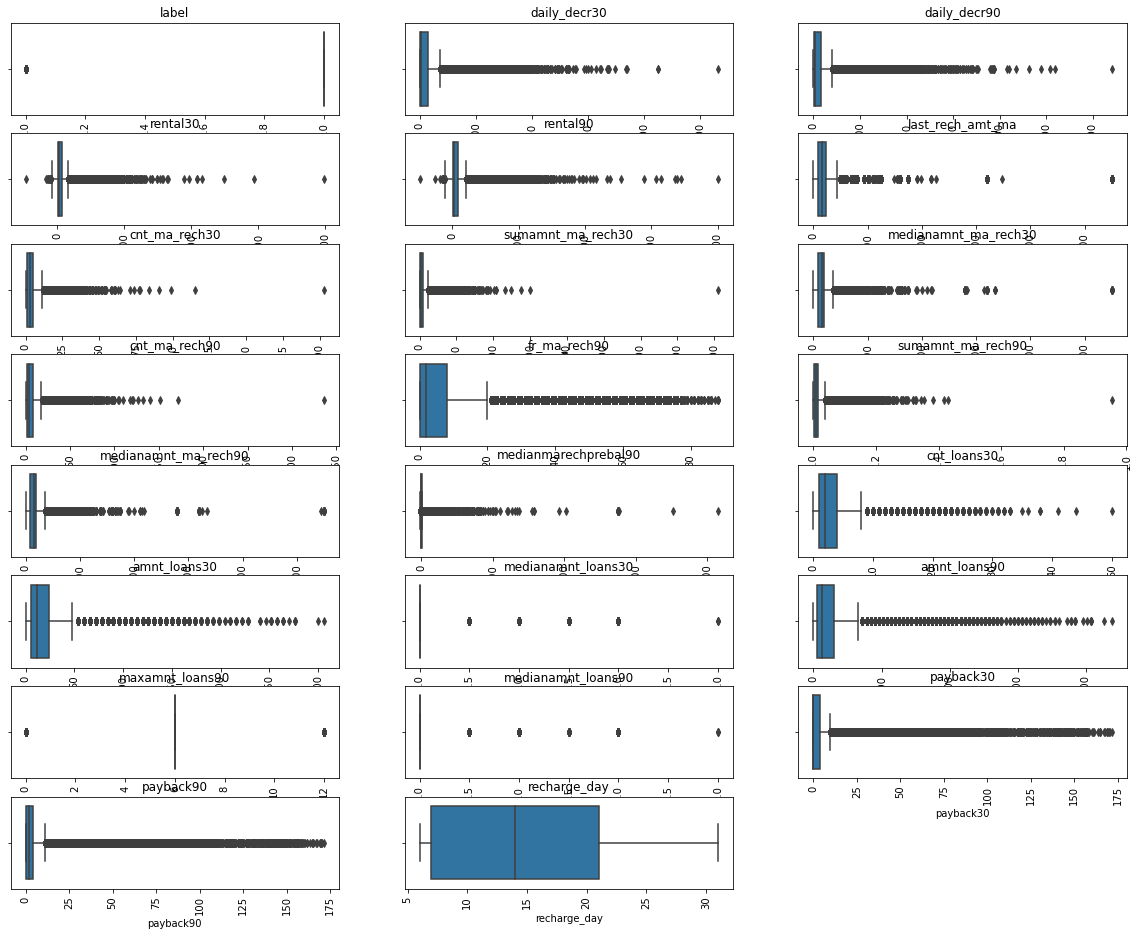

In [43]:
plt.figure(figsize=(20,20))
graph =1
for i in df.columns:
    if graph <=23:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[i])
        plt.title(i)
        plt.xticks(rotation=90)
        graph += 1
plt.show()        

In [13]:
df.skew()

label                   -2.270254
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_loans30              2.713421
amnt_loans30             2.975719
medianamnt_loans30       4.551043
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loans90       4.895720
payback30                8.310695
payback90                6.899951
recharge_day             0.473378
dtype: float64

all columns are showing skewed data.

In [11]:
from sklearn.preprocessing import PowerTransformer
skewed_features = ["daily_decr30","daily_decr90","rental30","rental90","last_rech_amt_ma","cnt_ma_rech30","sumamnt_ma_rech30",
                  "medianamnt_ma_rech30","cnt_ma_rech90","fr_ma_rech90","sumamnt_ma_rech90","medianamnt_ma_rech90","medianmarechprebal90",
                  "cnt_loans30","amnt_loans30","medianamnt_loans30","amnt_loans90","maxamnt_loans90","medianamnt_loans90","medianamnt_loans90",
                  "payback30","payback90"]
scaler = PowerTransformer(method='yeo-johnson')


In [12]:
df[skewed_features] = scaler.fit_transform(df[skewed_features].values)
df[skewed_features].head()


,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,medianamnt_loans90,payback30,payback90
0,0.332156,0.299181,-0.580786,-0.568411,0.083417,-0.275617,-0.177906,0.208594,-0.577409,1.335401,-0.440305,0.146193,-0.325841,0.011773,-0.097563,-0.269051,-0.250850,-0.285611,-0.248272,-0.248272,1.813266,1.783964
1,1.116021,1.045084,0.339736,0.148082,1.501277,-0.799355,0.219811,1.632404,-1.027906,-1.207069,-0.086685,1.682267,-0.002722,-0.913019,-0.097563,-0.269051,-0.250850,2.325828,-0.248272,-0.248272,-0.937405,-1.018917
2,-0.007508,-0.028203,-0.366965,-0.409047,0.083417,-0.799355,-0.535362,0.208594,-1.027906,-1.207069,-0.760548,0.146193,0.023770,-0.913019,-0.894782,-0.269051,-1.005714,-0.285611,-0.248272,-0.248272,-0.937405,-1.018917
3,-1.031486,-1.022743,-0.603059,-0.597731,-0.291052,-1.694157,-1.902189,-1.961729,-1.027906,-1.207069,-0.949332,-0.253806,-0.370968,0.011773,-0.097563,-0.269051,-0.250850,-0.285611,-0.248272,-0.248272,-0.937405,-1.018917
4,-0.682337,-0.680928,-0.310473,-0.364212,0.449550,0.992270,1.262660,0.575164,0.657800,-0.060965,0.974121,0.783547,-0.142977,1.570451,1.454951,-0.269051,1.097886,-0.285611,-0.248272,-0.248272,0.639236,0.431438


In [15]:
df.skew()

label                  -2.270254
daily_decr30           -6.582718
daily_decr90           -7.080191
rental30               -1.022844
rental90               -0.962717
last_rech_amt_ma       -0.061262
cnt_ma_rech30          -0.000145
sumamnt_ma_rech30      -0.291322
medianamnt_ma_rech30   -0.189628
cnt_ma_rech90          -0.002465
fr_ma_rech90            0.142952
sumamnt_ma_rech90      -0.192158
medianamnt_ma_rech90   -0.044604
medianmarechprebal90    7.506286
cnt_loans30             0.036243
amnt_loans30            0.001948
medianamnt_loans30      3.447735
amnt_loans90           -0.008988
maxamnt_loans90         0.364282
medianamnt_loans90      3.779598
payback30               0.298563
payback90               0.210887
recharge_day            0.473378
dtype: float64

keeping  range between -3/+3 ,we are taking only those columns which are out of this range.

# Outlier Removal

In [13]:
columns=df[['daily_decr30', 'daily_decr90', 
       'medianmarechprebal90','medianamnt_loans90']]
from scipy.stats import zscore
z = np.abs(zscore(columns))
z

array([[0.332156  , 0.29918138, 0.32584055, 0.24827185],
       [1.11602076, 1.04508396, 0.00272174, 0.24827185],
       [0.00750823, 0.02820273, 0.02376962, 0.24827185],
       ...,
       [1.10045475, 1.03342362, 0.0753427 , 0.24827185],
       [1.13605673, 1.06838078, 0.18258877, 0.24827185],
       [0.52502128, 0.48715657, 1.26249783, 0.24827185]])

In [17]:
threshold = 3
np.where(z>3)

(array([    30,     35,     37, ..., 209538, 209565, 209587], dtype=int64),
 array([3, 3, 3, ..., 3, 3, 3], dtype=int64))

In [14]:
df_new =df[(z<3).all(axis=1)]
df_new

,label,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,recharge_day
0,0,0.332156,0.299181,-0.580786,-0.568411,0.083417,-0.275617,-0.177906,0.208594,-0.577409,1.335401,-0.440305,0.146193,-0.325841,0.011773,-0.097563,-0.269051,-0.250850,-0.285611,-0.248272,1.813266,1.783964,20
1,1,1.116021,1.045084,0.339736,0.148082,1.501277,-0.799355,0.219811,1.632404,-1.027906,-1.207069,-0.086685,1.682267,-0.002722,-0.913019,-0.097563,-0.269051,-0.250850,2.325828,-0.248272,-0.937405,-1.018917,8
2,1,-0.007508,-0.028203,-0.366965,-0.409047,0.083417,-0.799355,-0.535362,0.208594,-1.027906,-1.207069,-0.760548,0.146193,0.023770,-0.913019,-0.894782,-0.269051,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917,19
3,1,-1.031486,-1.022743,-0.603059,-0.597731,-0.291052,-1.694157,-1.902189,-1.961729,-1.027906,-1.207069,-0.949332,-0.253806,-0.370968,0.011773,-0.097563,-0.269051,-0.250850,-0.285611,-0.248272,-0.937405,-1.018917,6
4,1,-0.682337,-0.680928,-0.310473,-0.364212,0.449550,0.992270,1.262660,0.575164,0.657800,-0.060965,0.974121,0.783547,-0.142977,1.570451,1.454951,-0.269051,1.097886,-0.285611,-0.248272,0.639236,0.431438,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,-0.680457,-0.679097,-0.313194,-0.366369,1.051183,0.096120,0.664001,0.903883,-0.256024,-0.060965,0.305507,0.894046,0.145343,0.011773,-0.097563,-0.269051,-0.250850,-0.285611,-0.248272,0.094998,-0.098305,17
209589,1,-0.950215,-0.942830,-0.140654,-0.229845,-0.429509,0.384542,-0.175310,-0.303313,0.373347,-0.060965,-0.296176,-0.400935,0.234990,0.556347,0.393236,-0.269051,0.192260,-0.285611,-0.248272,0.094998,-0.098305,6
209590,1,1.100455,1.033424,0.825400,1.022476,0.083417,0.620252,0.575767,0.208594,0.984805,0.509415,0.765499,0.146193,-0.075343,0.924658,1.454951,-0.269051,1.358455,2.325828,-0.248272,0.974292,0.752939,29
209591,1,1.136057,1.068381,-0.515607,-0.389820,-0.429509,0.620252,0.795555,-0.303313,0.373347,0.369295,0.734963,0.585178,0.182589,0.011773,0.393236,-0.269051,0.503740,2.325828,-0.248272,-0.937405,1.337831,25


In [56]:
data_loss = ((209593-194420)/(194420) * 100)
data_loss

7.80423824709392

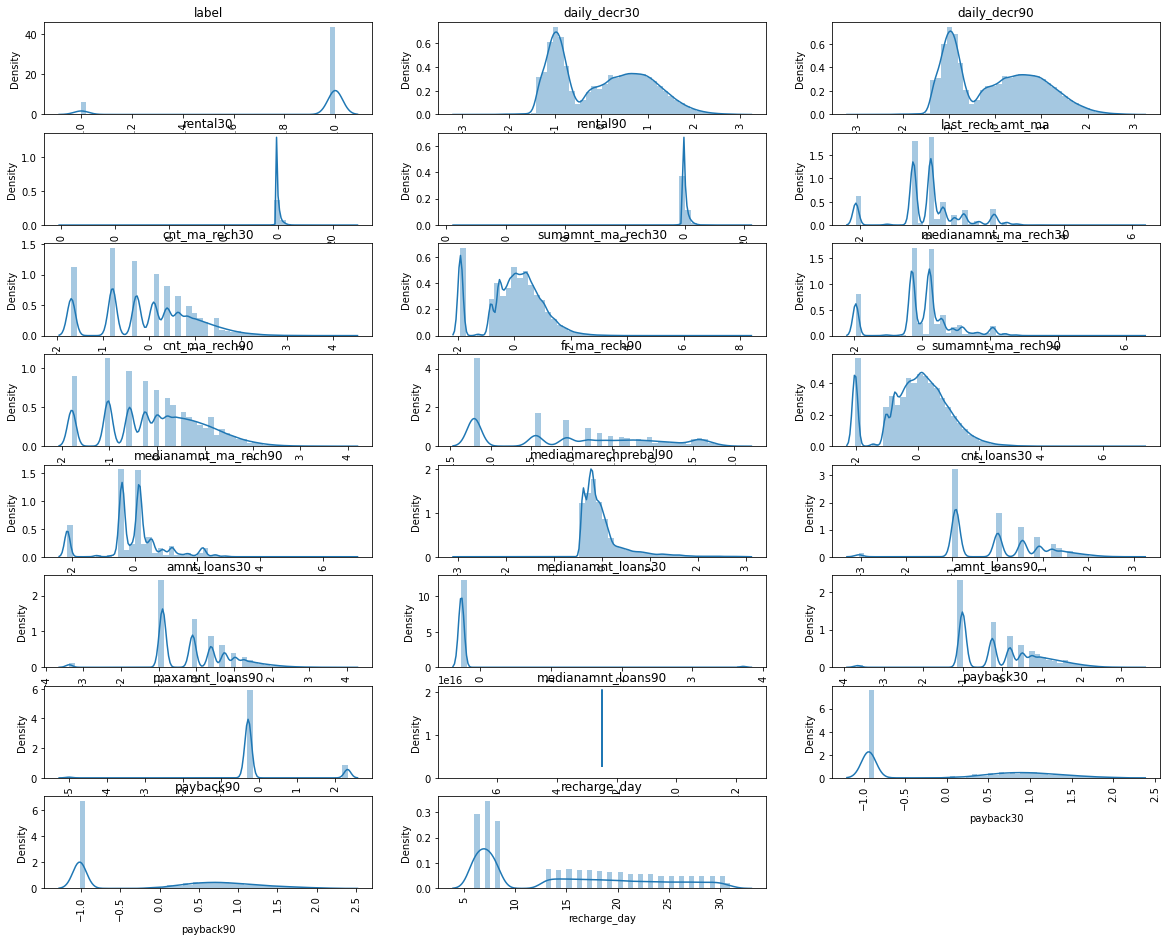

In [58]:
## Again checking distribition in columns :
plt.figure(figsize=(20,20))
graph =1
for i in df_new.columns:
    if graph <=23:
        ax=plt.subplot(10,3,graph)
        sns.distplot(df_new[i])
        plt.title(i)
        plt.xticks(rotation=90)
        graph += 1
plt.show()        

We have already removed outliers,We have allowed only 7-8 % data loss, So will now proceed for model building.

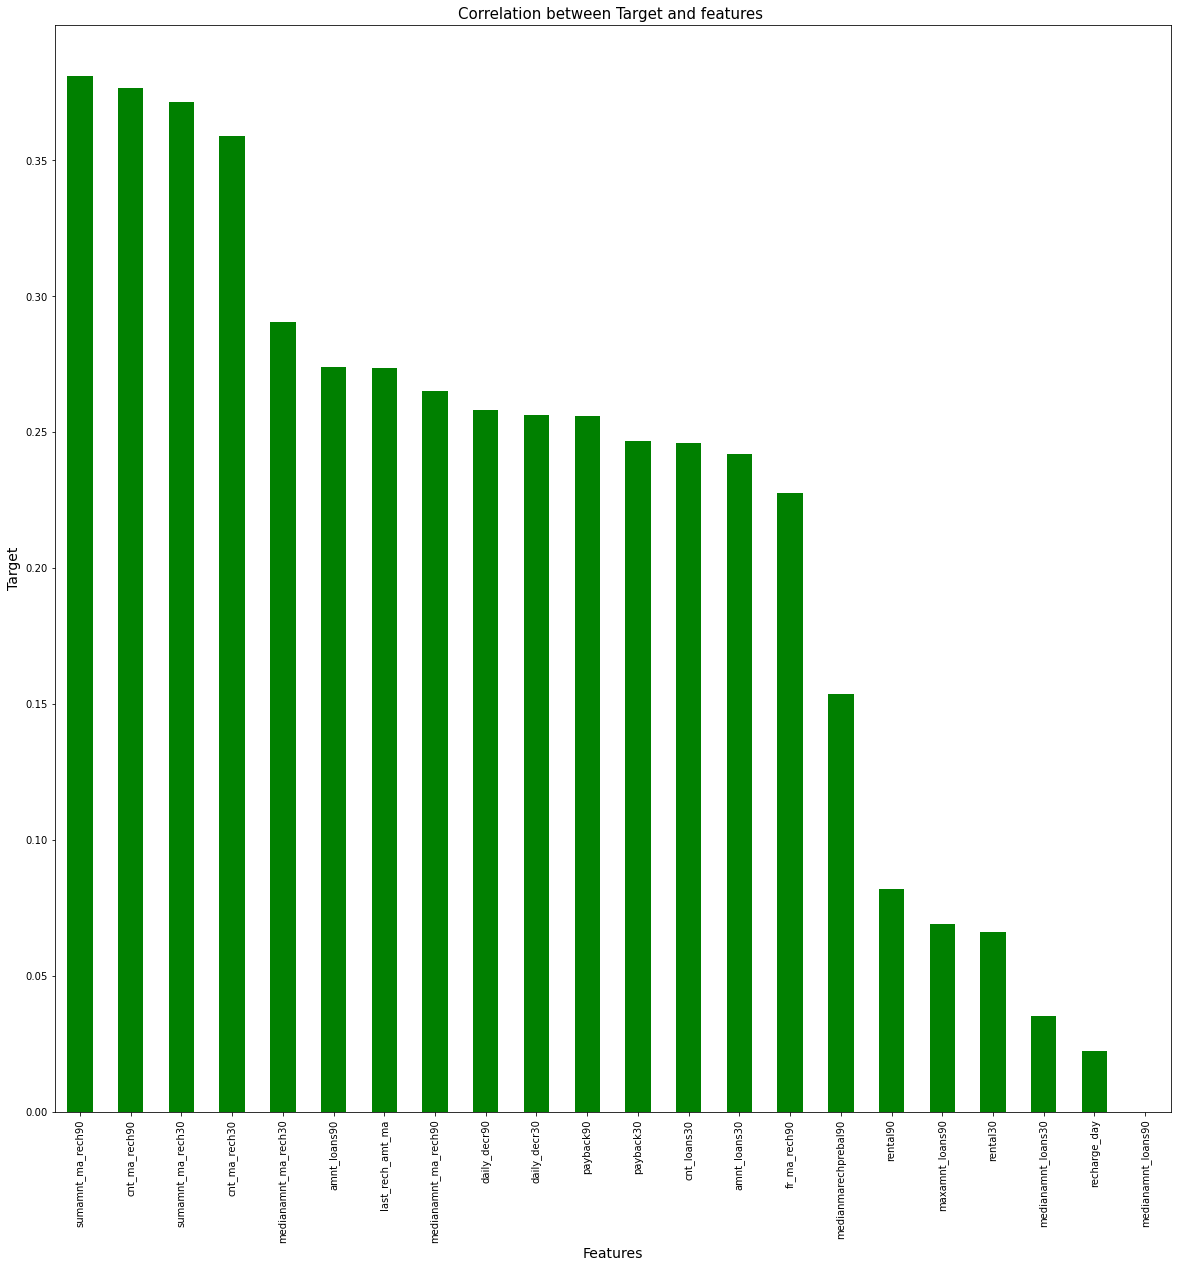

In [61]:
plt.figure(figsize=(20,20))
df_new.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.xticks(rotation=90)
plt.title('Correlation between Target and features ',fontsize=15)
plt.show()


In [15]:
df_new.drop('medianamnt_loans90',inplace=True,axis=1)

# Separating Features and Target for Classification Problem:

In [16]:
x = df_new.drop('label',axis=1)
y= df_new['label']

In [21]:
x.shape,y.shape

((194420, 21), (194420,))

In [66]:
y.value_counts()

1    169667
0     24753
Name: label, dtype: int64

Data is not balanced in target column,So will balace it through oversampling.

In [17]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)


In [68]:
y.value_counts()

0    169667
1    169667
Name: label, dtype: int64

Now data are balanced in target column.

<AxesSubplot:xlabel='label', ylabel='count'>

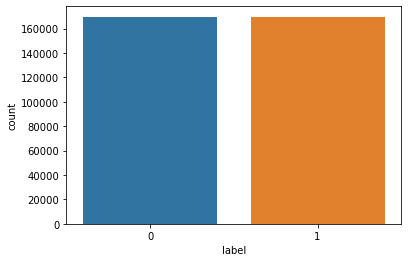

In [23]:
sns.countplot(y)

# Standard Scaler

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,payback30,payback90,recharge_day
0,0.649659,0.620789,-0.535698,-0.520873,0.361469,0.109185,0.220206,0.486768,-0.159495,1.541087,-0.009178,0.407797,-0.564762,0.289813,0.171386,-0.090406,0.039532,-0.242795,2.118435,2.050938,0.726579
1,1.495543,1.432026,0.433861,0.258061,1.620166,-0.396104,0.589888,1.757083,-0.592997,-0.922271,0.320069,1.761009,0.209549,-0.723646,0.171386,-0.090406,0.039532,2.919722,-0.707857,-0.759802,-0.822539
2,0.283121,0.264729,-0.310486,-0.347621,0.361469,-0.396104,-0.112051,0.486768,-0.592997,-0.922271,-0.307349,0.407797,0.273032,-0.723646,-0.710870,-0.090406,-0.778061,-0.242795,-0.707857,-0.759802,0.597486
3,-0.821874,-0.816925,-0.559157,-0.552748,0.029037,-1.259386,-1.382528,-1.449583,-0.592997,-0.922271,-0.483120,0.055416,-0.672903,0.289813,0.171386,-0.090406,0.039532,-0.242795,-0.707857,-0.759802,-1.080725
4,-0.445100,-0.445170,-0.250986,-0.298878,0.686502,1.332411,1.559224,0.813820,1.029115,0.188170,1.307758,0.969277,-0.126555,1.997934,1.889502,-0.090406,1.500348,-0.242795,0.912129,0.694619,0.984765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339329,0.122875,0.116183,-0.633310,-0.615140,-1.590848,-1.259386,-1.382528,-1.449583,-1.327680,-0.922271,-1.484663,-1.601715,-0.742095,-0.723646,-0.710870,-0.090406,-0.778061,-0.242795,-0.707857,-0.759802,-0.951632
339330,0.472064,0.451818,-0.499466,-0.472668,-0.096147,0.973498,0.343249,0.027776,1.135047,0.403713,0.421080,-0.076587,-0.471269,-0.723646,-0.710870,-0.090406,-0.778061,-0.242795,-0.707857,-0.759802,-0.951632
339331,-1.129679,-1.124611,-0.472350,-0.480782,-1.590848,-1.259386,-1.382528,-1.449583,-1.327680,-0.922271,-1.484663,-1.601715,-0.742095,-0.723646,-0.710870,-0.090406,-0.778061,-0.242795,-0.707857,-0.759802,0.210206
339332,1.411125,1.353724,0.188861,0.149956,0.293951,1.498791,1.203803,0.419382,1.248458,0.339100,1.025797,0.336682,-0.360712,1.997934,1.889502,-0.090406,1.628662,-0.242795,0.987130,0.992515,0.468393


# Checking for Multicollinearity Problem using VIF:- 

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif


,VIF values,Features
0,330.734530,daily_decr30
1,347.060577,daily_decr90
2,19.424264,rental30
3,20.595825,rental90
4,11.374783,last_rech_amt_ma
5,77.882483,cnt_ma_rech30
6,145.065128,sumamnt_ma_rech30
7,29.673154,medianamnt_ma_rech30
8,85.275681,cnt_ma_rech90
9,1.590545,fr_ma_rech90


daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans30,amnt_loans90 columns have vif values greater than 10.

Vif value is highest for daily_decr90.so dropping this column

In [20]:
x.drop('daily_decr90',axis=1,inplace=True)

In [21]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif


,VIF values,Features
0,2.727851,daily_decr30
1,17.895218,rental30
2,18.773586,rental90
3,11.338360,last_rech_amt_ma
4,77.634327,cnt_ma_rech30
5,140.901167,sumamnt_ma_rech30
6,28.792737,medianamnt_ma_rech30
7,84.998606,cnt_ma_rech90
8,1.586005,fr_ma_rech90
9,133.470083,sumamnt_ma_rech90


In [ ]:
 Now Vif value is highest for sumamnt_ma_rech30.so dropping this column.

In [22]:
x.drop('sumamnt_ma_rech30',axis=1,inplace=True)

In [23]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif


,VIF values,Features
0,2.727680,daily_decr30
1,17.837096,rental30
2,18.697212,rental90
3,11.141832,last_rech_amt_ma
4,16.674157,cnt_ma_rech30
5,6.540139,medianamnt_ma_rech30
6,33.920198,cnt_ma_rech90
7,1.582510,fr_ma_rech90
8,35.132431,sumamnt_ma_rech90
9,16.683784,medianamnt_ma_rech90


 Now Vif value is highest for amnt_loans30.so dropping this column.

In [24]:
x.drop('amnt_loans30',axis=1,inplace=True)

In [25]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif


,VIF values,Features
0,2.706661,daily_decr30
1,17.832015,rental30
2,18.682066,rental90
3,11.138037,last_rech_amt_ma
4,16.522612,cnt_ma_rech30
5,6.501212,medianamnt_ma_rech30
6,33.712672,cnt_ma_rech90
7,1.576361,fr_ma_rech90
8,34.755308,sumamnt_ma_rech90
9,16.664212,medianamnt_ma_rech90


 Now Vif value is highest for sumamnt_ma_rech90.so dropping this column.

In [26]:
x.drop('sumamnt_ma_rech90',axis=1,inplace = True)

In [27]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif


,VIF values,Features
0,2.544482,daily_decr30
1,17.831986,rental30
2,18.680729,rental90
3,11.053684,last_rech_amt_ma
4,16.368070,cnt_ma_rech30
5,6.394608,medianamnt_ma_rech30
6,18.694785,cnt_ma_rech90
7,1.573173,fr_ma_rech90
8,12.472229,medianamnt_ma_rech90
9,1.248391,medianmarechprebal90


 Now Vif value is highest for rental90.so dropping this column.

In [28]:
x.drop('rental90',axis =1,inplace = True)

In [29]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif


,VIF values,Features
0,2.537847,daily_decr30
1,1.231906,rental30
2,11.050339,last_rech_amt_ma
3,16.122330,cnt_ma_rech30
4,6.385289,medianamnt_ma_rech30
5,18.281571,cnt_ma_rech90
6,1.571871,fr_ma_rech90
7,12.462907,medianamnt_ma_rech90
8,1.248275,medianmarechprebal90
9,11.937579,cnt_loans30


In [ ]:
 Now Vif value is highest for cnt_ma_rech30.so dropping this column.

In [30]:
x.drop('cnt_ma_rech30',axis=1,inplace = True)

In [31]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif


,VIF values,Features
0,2.496788,daily_decr30
1,1.231902,rental30
2,10.906279,last_rech_amt_ma
3,4.453366,medianamnt_ma_rech30
4,4.393620,cnt_ma_rech90
5,1.527850,fr_ma_rech90
6,11.983859,medianamnt_ma_rech90
7,1.247798,medianmarechprebal90
8,10.001432,cnt_loans30
9,1.035820,medianamnt_loans30


In [ ]:
 Now Vif value is highest for medianamnt_ma_rech90.so dropping this column.

In [32]:
x.drop('medianamnt_ma_rech90',inplace = True,axis=1)

In [33]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif


,VIF values,Features
0,2.491881,daily_decr30
1,1.231901,rental30
2,3.860888,last_rech_amt_ma
3,3.926044,medianamnt_ma_rech30
4,4.387488,cnt_ma_rech90
5,1.520583,fr_ma_rech90
6,1.238679,medianmarechprebal90
7,9.998854,cnt_loans30
8,1.035820,medianamnt_loans30
9,14.379548,amnt_loans90


In [ ]:
Now Vif value of  amnt_loans90 is greater than 10.So dropping this column.

In [34]:
x.drop('amnt_loans90',inplace = True,axis=1)

In [35]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif


,VIF values,Features
0,2.350305,daily_decr30
1,1.231062,rental30
2,3.842199,last_rech_amt_ma
3,3.923354,medianamnt_ma_rech30
4,3.981255,cnt_ma_rech90
5,1.511202,fr_ma_rech90
6,1.235195,medianmarechprebal90
7,3.327224,cnt_loans30
8,1.024637,medianamnt_loans30
9,1.199674,maxamnt_loans90


Now all  vif values are less than 10.

# Building Models

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train Test Spilit

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=151)

In [38]:
x_train.shape,y_train.shape

((237533, 13), (237533,))

In [39]:
x_test.shape,y_test.shape

((101801, 13), (101801,))

# Model Building

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve


# KNeighbors Classifier

In [41]:
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)
predknc = knc.predict(x_test)

print(accuracy_score(y_test, predknc))
print(confusion_matrix(y_test, predknc))
print(classification_report(y_test,predknc))


0.8858066227247277
[[48833  2158]
 [ 9467 41343]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89     50991
           1       0.95      0.81      0.88     50810

    accuracy                           0.89    101801
   macro avg       0.89      0.89      0.89    101801
weighted avg       0.89      0.89      0.89    101801



Text(0.5, 1.0, 'Confusion Matrix for Kneighbors Classifier')

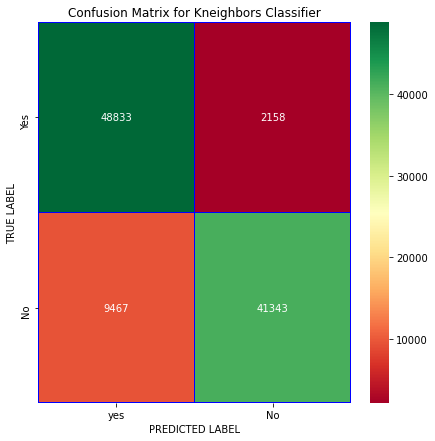

In [43]:
cm = confusion_matrix(y_test,predknc)

x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, cmap = 'RdYlGn',linecolor="blue", fmt = ".0f", ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Kneighbors Classifier')


True Positive-48833,True Negative-41343,False Positive-2158,False Negative-9467

# DecisionTreeClassifier

In [45]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc = dtc.predict(x_test)

print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test,preddtc))


0.8972308719953636
[[46204  4787]
 [ 5675 45135]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     50991
           1       0.90      0.89      0.90     50810

    accuracy                           0.90    101801
   macro avg       0.90      0.90      0.90    101801
weighted avg       0.90      0.90      0.90    101801



<AxesSubplot:>

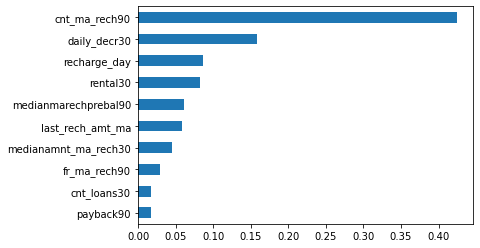

In [46]:
importances = dtc.feature_importances_
weights = pd.Series(importances,
                 index=x.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

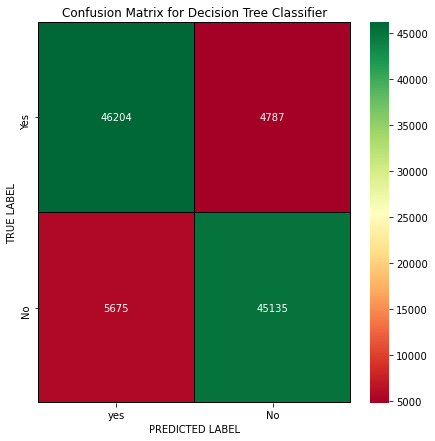

In [47]:
cm = confusion_matrix(y_test,preddtc)

x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2,cmap = 'RdYlGn', linecolor="black", fmt = ".0f", ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')


True Positive-46204,True Negative-45135,False Positive-4787,False Negative-5675

# AdaBoostClassifier

In [48]:
adb = AdaBoostClassifier()
adb.fit(x_train,y_train)
predadb = adb.predict(x_test)

print(accuracy_score(y_test, predadb))
print(confusion_matrix(y_test, predadb))
print(classification_report(y_test,predadb))


0.8279977603363424
[[42870  8121]
 [ 9389 41421]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     50991
           1       0.84      0.82      0.83     50810

    accuracy                           0.83    101801
   macro avg       0.83      0.83      0.83    101801
weighted avg       0.83      0.83      0.83    101801



<AxesSubplot:>

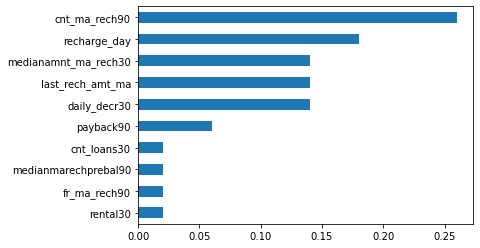

In [49]:
importances = adb.feature_importances_
weights = pd.Series(importances,
                 index=x.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')


Text(0.5, 1.0, 'Confusion Matrix for Ada Boost Classifier')

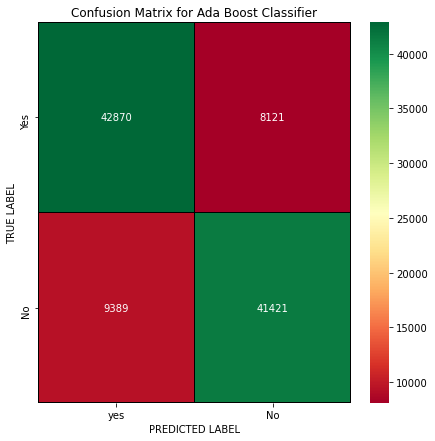

In [51]:
cm = confusion_matrix(y_test,predadb)

x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2,cmap = 'RdYlGn', linecolor="black", fmt = ".0f", ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Ada Boost Classifier')


True Positive-42870,True Negative-41421,False Positive-8121,False Negative-9389

# RandomForestClassifier

In [52]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)

print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))


0.940560505299555
[[47998  2993]
 [ 3058 47752]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     50991
           1       0.94      0.94      0.94     50810

    accuracy                           0.94    101801
   macro avg       0.94      0.94      0.94    101801
weighted avg       0.94      0.94      0.94    101801



<AxesSubplot:>

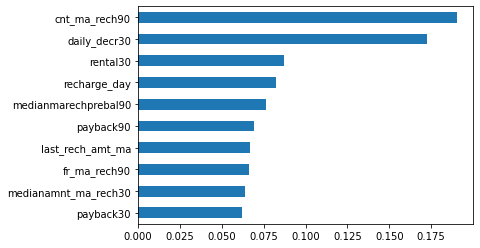

In [53]:
importances = rfc.feature_importances_
weights = pd.Series(importances,
                 index=x.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')


Text(0.5, 1.0, 'Confusion Matrix for Random Forest  Classifier')

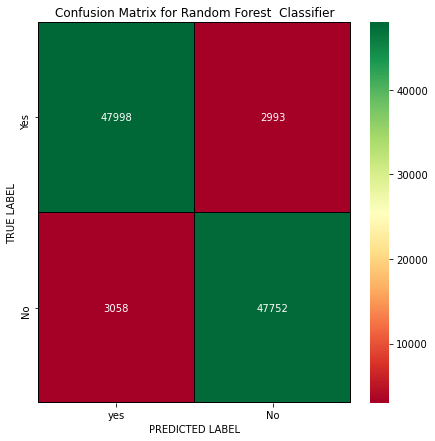

In [54]:
cm = confusion_matrix(y_test,predrfc)

x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2,cmap = 'RdYlGn', linecolor="black", fmt = ".0f", ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest  Classifier')


True Positive-47998,True Negative-47752,False Positive-2993,False Negative-3058

# LogisticRegression

In [55]:
lgr = LogisticRegression()
lgr.fit(x_train,y_train)
predlgr = lgr.predict(x_test)

print(accuracy_score(y_test, predlgr))
print(confusion_matrix(y_test, predlgr))
print(classification_report(y_test,predlgr))


0.7646093849765719
[[38289 12702]
 [11261 39549]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     50991
           1       0.76      0.78      0.77     50810

    accuracy                           0.76    101801
   macro avg       0.76      0.76      0.76    101801
weighted avg       0.76      0.76      0.76    101801



AxesSubplot(0.125,0.125;0.775x0.755)


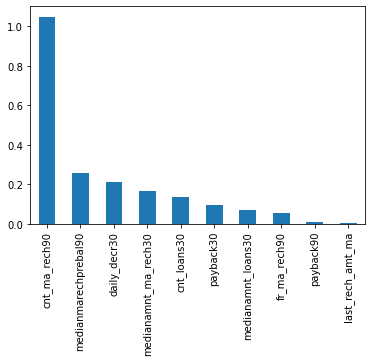

In [56]:
weights = pd.Series(lgr.coef_[0],
                 index=x.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Classifier')

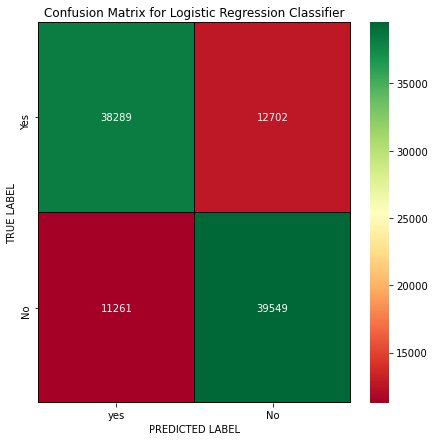

In [57]:
cm = confusion_matrix(y_test,predlgr)

x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2,cmap = 'RdYlGn', linecolor="black", fmt = ".0f", ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')


True Positive-38289,True Negative-39549,False Positive-12702,False Negative-11261

# Cross Validation

In [58]:
from sklearn.model_selection import ShuffleSplit
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=151)
cvs = cross_val_score(lgr, x, y, cv=cv)
print("Cross Validation of LogisticRegression model ",cvs.mean())


Cross Validation of LogisticRegression model  0.7632007544130215


In [59]:
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=151)
cvs = cross_val_score(knc, x, y, cv=cv)
print("Cross Validation of KNeighbors Classifier model ",cvs.mean())


Cross Validation of KNeighbors Classifier model  0.8858930658834392


In [60]:
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=151)
cvs = cross_val_score(dtc, x, y, cv=cv)
print("Cross Validation of DecisionTree Classifier model ",cvs.mean())


Cross Validation of DecisionTree Classifier model  0.8974803783852809


In [61]:
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=101)
cvs = cross_val_score(rfc, x, y, cv=cv)
print("Cross Validation of Random Forest Classifier model ",cvs.mean())


Cross Validation of Random Forest Classifier model  0.939405310360409


In [62]:
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=101)
cvs = cross_val_score(adb, x, y, cv=cv)
print("Cross Validation of Ada Boost Classifier model ",cvs.mean())


Cross Validation of Ada Boost Classifier model  0.8289270242924921


So we can see that our model is performing excellent for unseen data also.Random forest has given highest score,so will do 
hyper parameter tuning for that.

# HyperParameter Tuning

In [64]:
from sklearn.model_selection import GridSearchCV

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 151,test_size = 0.30)
rf = RandomForestClassifier()
parameters={'n_estimators' : [100,200],
            'criterion':['gini','entropy'],
           # 'max_depth':range(2,10),
            'max_features':["auto","sqrt","log2"],
            }


    
gridsearch=GridSearchCV(rf,parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_


{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 200}

In [65]:
## Providing Best parameter to model:-
rf = RandomForestClassifier(criterion='entropy',n_estimators=200,max_features='sqrt')
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
score = accuracy_score(y_test,predrf)
print("Accuracy Score :",score*100)
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))


Accuracy Score : 94.04819206098172
[[47983  3008]
 [ 3051 47759]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     50991
           1       0.94      0.94      0.94     50810

    accuracy                           0.94    101801
   macro avg       0.94      0.94      0.94    101801
weighted avg       0.94      0.94      0.94    101801



Given almost same result as before without hyperparameter tuning.So will save our model with default parameters.

# Plotting roc_auc_curve

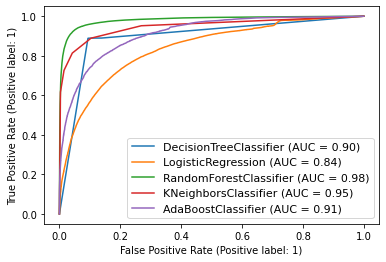

In [67]:
disp =plot_roc_curve(dtc,x_test,y_test)   
plot_roc_curve(lgr,x_test,y_test,ax = disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(knc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(adb,x_test,y_test,ax = disp.ax_)
plt.legend(prop={'size': 11},loc = 'lower right')
plt.show()


We can see  Random Forest Model, Area Under Curve is 98 percent.Our model is performing extremely well.

# Saving the Model:-

In [68]:
import pickle
filename ='micro_credit_loan_defaulter_prediction.pickle'
pickle.dump(rfc,open(filename,'wb'))

# Conclusion

In [69]:
a = np.array(y_test)
predicted = np.array(rfc.predict(x_test))
new_df = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
new_df


,Original,Predicted
0,1,1
1,0,0
2,1,0
3,1,0
4,1,1
...,...,...
101796,1,1
101797,1,1
101798,0,0
101799,1,1


So here, I can conclude that customers who will pay back loan within 5 days,they fall under some of following observations:
Their daily amount spent from main account is continuous and more.
Their average main account balance(over last 30 days) is always maintained.
Their count and frequency of main account got recharged is continuous and more.
Their count of number of loans,amount of loans,maximum amount of loans,Median of amounts of loan  is always more than a defaulter person.
They always payback their loan with in given limit.